#CNN Classifier for CIFAR-10

In [23]:
# Author: Alexander Le
# Date: April 24th, 2022

import torch
import numpy as np
import matplotlib.pyplot as plt
import torchvision
import torch.nn as nn
import torch.nn.functional as F

# use pip install torch, numpy, matplotlib, and torchvision if those libraries 
# aren't installed on your system!

In [24]:
if torch.cuda.is_available():
    device = torch.device('cuda:0')
    print('Running on GPU')
    print(torch.cuda.get_device_name(0))
else:
    device = torch.device('cpu')
    print('Running on CPU')

Running on CPU


In [ ]:
# download the CIFAR 10 training and testing data sets from torchvision.datasets

train_dataset = torchvision.datasets.CIFAR10(root='./cifar10', transform=torchvision.transforms.ToTensor(), download=True)
test_dataset = torchvision.datasets.CIFAR10(root='./cifar10', train=False, transform=torchvision.transforms.ToTensor(), download=True)

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./cifar10/cifar-10-python.tar.gz to ./cifar10
Files already downloaded and verified


In [ ]:
# TODO: create training and testing loaders
# Hint: you'll want to read the documentation for torch.utils.data.DataLoader
# experiment with batch sizes, other hyperparams


train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=16, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=16, shuffle=True)

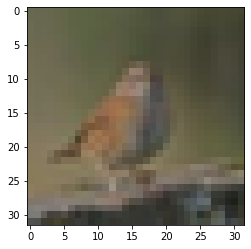

In [ ]:
# visualizing a sample from train loader

train_iter = iter(train_loader)

batch_images, batch_labels = next(train_iter)
image, label = batch_images[0], batch_labels[0]
plt.imshow(image.permute(1,2,0))
plt.show()

# Building the model

In [ ]:
# Construct the CNN model
# CONV -> MAX POOL -> CONV -> FLATTEN -> LINEAR

class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, kernel_size=5, padding=2)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, kernel_size=3, padding=1)
        self.flat = nn.Flatten()
        self.dense1 = nn.Linear(16 * 8 * 8, 256)
        self.dense2 = nn.Linear(256, 128)
        self.dense3 = nn.Linear(128, 10)
        
        
    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = self.pool(x)
        x = F.relu(self.conv2(x))
        x = self.pool(x)
        x = self.flat(x)
        x = F.relu(self.dense1(x)) 
        x = F.relu(self.dense2(x)) 
        x = self.dense3(x) 

        return x

In [ ]:
# Create an instance of the CNN class

model = CNN()

model.to(device) # specify that this model will be stored on the device you chose earlier (GPU or CPU)

CNN(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (flat): Flatten(start_dim=1, end_dim=-1)
  (dense1): Linear(in_features=1024, out_features=256, bias=True)
  (dense2): Linear(in_features=256, out_features=128, bias=True)
  (dense3): Linear(in_features=128, out_features=10, bias=True)
)

In [ ]:
# Choose your loss function. 
# Since we're doing classification, nn.CrossEntropyLoss() is a good choice for the loss function

criterion = nn.CrossEntropyLoss()

# Choose an optimizer and its hyperparameters
# you can experiment with different choices here and see how it affects the training

optimizer = torch.optim.Adam(model.parameters(), weight_decay=1e-3)

#Training

In [ ]:
# Create a training function which takes in the pieces you just created
# and runs one epoch  (recall the definition of an epoch)

def train_one_epoch(model, train_loader, optimizer, criterion, device):
    # what is the first thing to do before starting training?
    model.train()
    for i, batch in enumerate(train_loader):
      batch_inputs, batch_labels = batch
      batch_inputs = batch_inputs.to(device)
      batch_labels = batch_labels.to(device)
      predictions = model(batch_inputs)
      loss = criterion(predictions, batch_labels)
      loss.backward()
      optimizer.step()
      optimizer.zero_grad()



    print('End of epoch loss:', round(loss.item(), 3))

#Testing

In [ ]:
# Write a function to test the mode
def test(model, test_loader, device):
    # we've manually specified the classes - these are from the cifar-10 dataset
    classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

    # what is the first thing to do before testing?
    model.eval()
    correct = 0
    for i, batch in enumerate(test_loader):
      batch_inputs, batch_labels = batch
      batch_inputs = batch_inputs.to(device)
      batch_labels = batch_labels.to(device)
      predictions = model(batch_inputs)
      predictions = predictions.argmax(axis = 1)
      correct += (predictions == batch_labels).sum().item()
        
    print('End of epoch accuracy:', 100*correct/len(test_dataset), '%')
    

    # visualizing the current model's performance - no changes required
    for i in range(4):
        print('Guess:', classes[predictions[i]], '| Label:', classes[batch_labels[i]])
        plt.imshow(batch_inputs[i].cpu().permute(1,2,0))
        plt.show()

#Running the train-test loop

Epoch:  1
End of epoch loss: 0.993
End of epoch accuracy: 48.36 %
Guess: truck | Label: truck


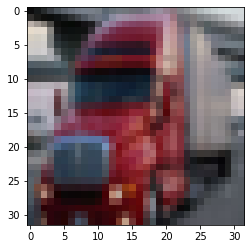

Guess: dog | Label: dog


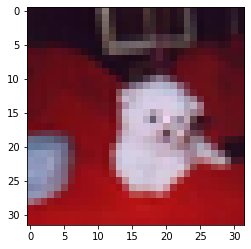

Guess: deer | Label: bird


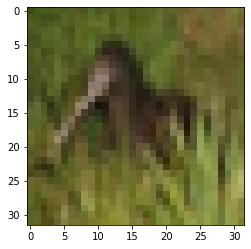

Guess: car | Label: car


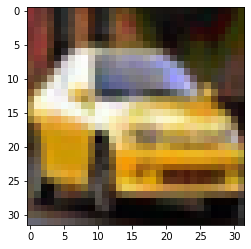

Epoch:  2
End of epoch loss: 1.446
End of epoch accuracy: 55.73 %
Guess: frog | Label: frog


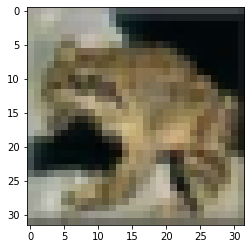

Guess: bird | Label: deer


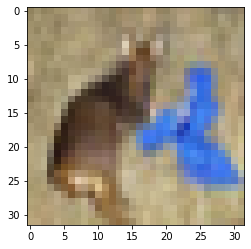

Guess: deer | Label: dog


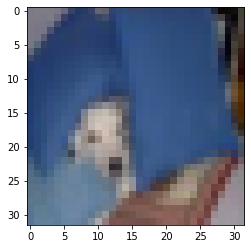

Guess: truck | Label: horse


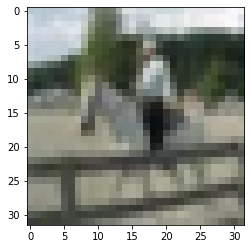

Epoch:  3
End of epoch loss: 1.302
End of epoch accuracy: 58.49 %
Guess: car | Label: car


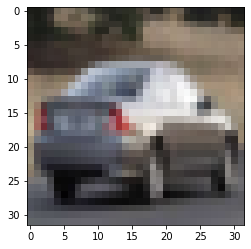

Guess: frog | Label: frog


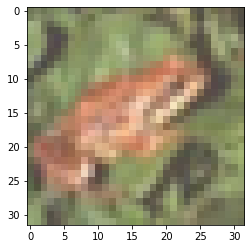

Guess: car | Label: car


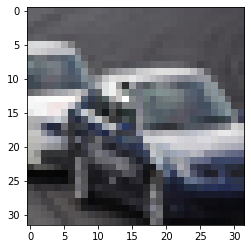

Guess: bird | Label: bird


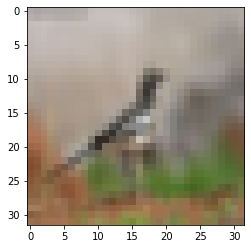

Epoch:  4
End of epoch loss: 1.333
End of epoch accuracy: 61.18 %
Guess: car | Label: car


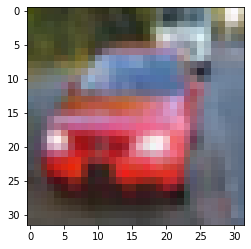

Guess: bird | Label: bird


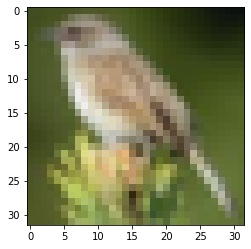

Guess: truck | Label: truck


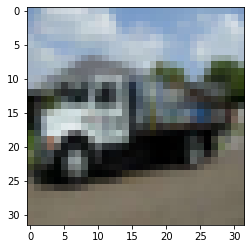

Guess: car | Label: car


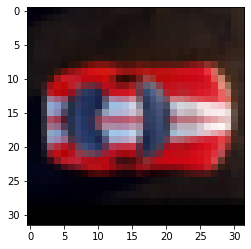

Epoch:  5
End of epoch loss: 0.572
End of epoch accuracy: 60.98 %
Guess: ship | Label: ship


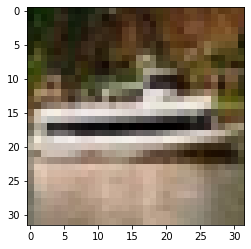

Guess: horse | Label: deer


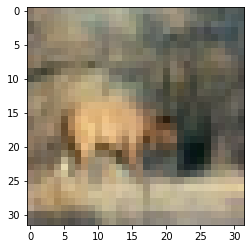

Guess: horse | Label: horse


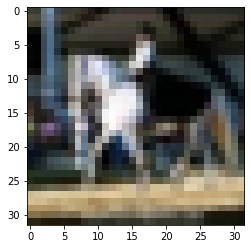

Guess: frog | Label: frog


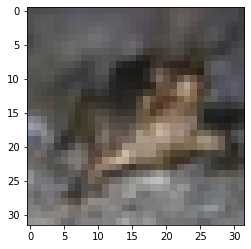

Epoch:  6
End of epoch loss: 1.303
End of epoch accuracy: 61.32 %
Guess: car | Label: car


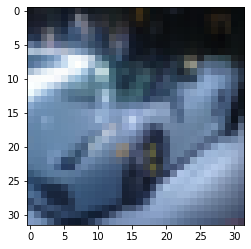

Guess: truck | Label: truck


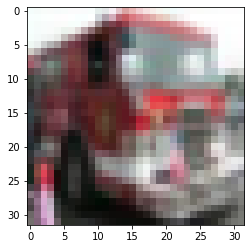

Guess: deer | Label: deer


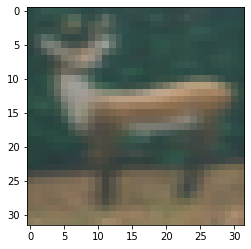

Guess: car | Label: car


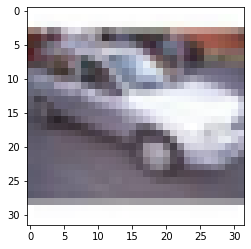

Epoch:  7
End of epoch loss: 1.208
End of epoch loss: 1.208
End of epoch accuracy: 63.27 %
Guess: frog | Label: frog
End of epoch accuracy: 63.27 %
Guess: frog | Label: frog


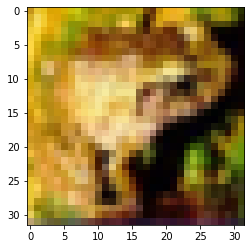

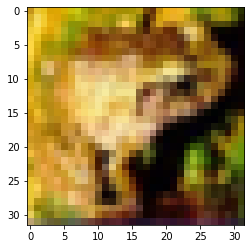

Guess: ship | Label: ship
Guess: ship | Label: ship


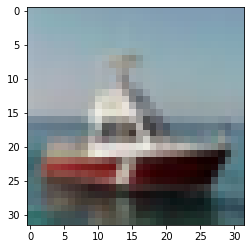

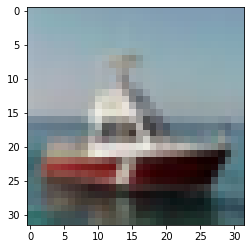

Guess: deer | Label: bird
Guess: deer | Label: bird


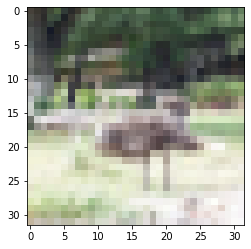

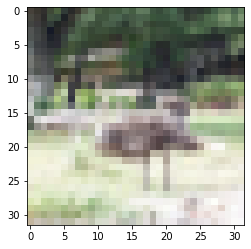

Guess: deer | Label: deer
Guess: deer | Label: deer


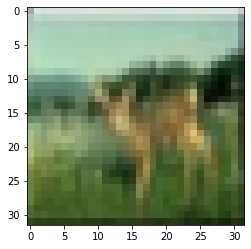

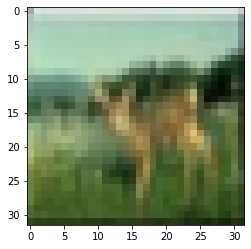

Epoch:  8
Epoch:  8
End of epoch loss: 0.734
End of epoch loss: 0.734
End of epoch accuracy: 63.13 %
Guess: car | Label: car
End of epoch accuracy: 63.13 %
Guess: car | Label: car


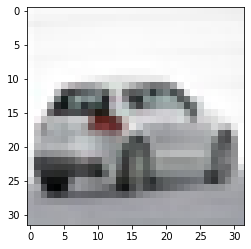

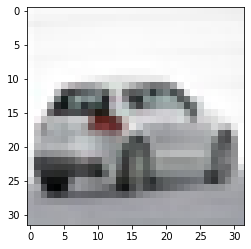

Guess: deer | Label: frog
Guess: deer | Label: frog


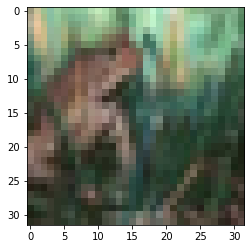

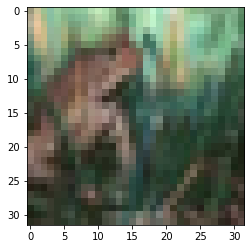

Guess: horse | Label: horse
Guess: horse | Label: horse


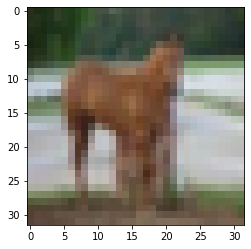

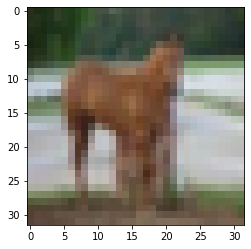

Guess: frog | Label: frog
Guess: frog | Label: frog


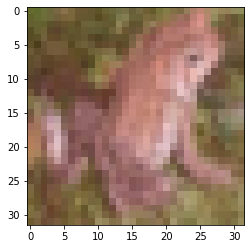

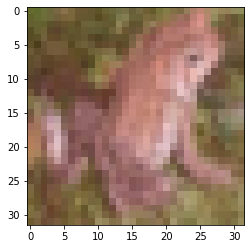

Epoch:  9
Epoch:  9
End of epoch loss: 0.834
End of epoch loss: 0.834
End of epoch accuracy: 63.97 %
Guess: car | Label: car
End of epoch accuracy: 63.97 %
Guess: car | Label: car


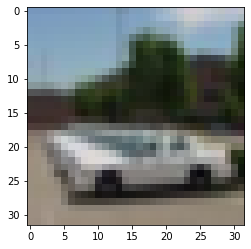

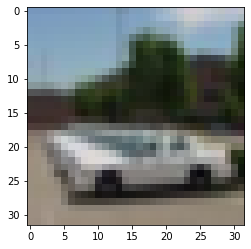

Guess: plane | Label: deer
Guess: plane | Label: deer


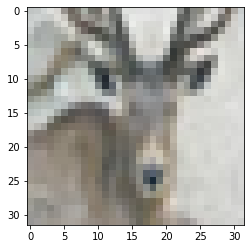

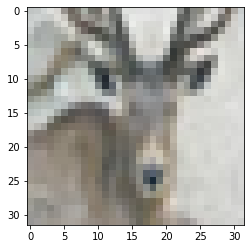

Guess: plane | Label: car
Guess: plane | Label: car


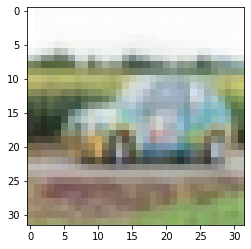

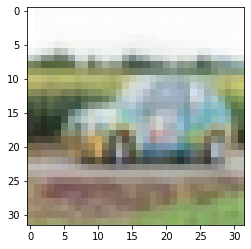

Guess: plane | Label: plane
Guess: plane | Label: plane


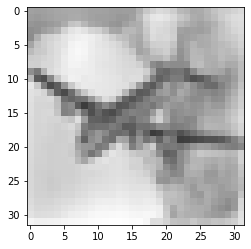

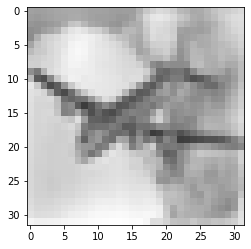

Epoch:  10
Epoch:  10
End of epoch loss: 0.599
End of epoch loss: 0.599
End of epoch accuracy: 64.08 %
Guess: horse | Label: horse
End of epoch accuracy: 64.08 %
Guess: horse | Label: horse


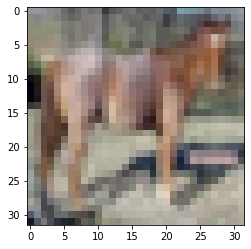

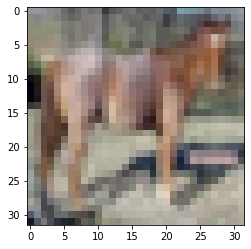

Guess: plane | Label: ship
Guess: plane | Label: ship


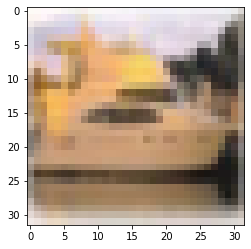

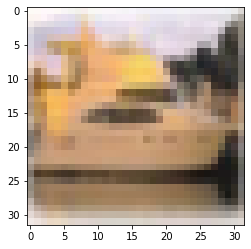

Guess: deer | Label: bird
Guess: deer | Label: bird


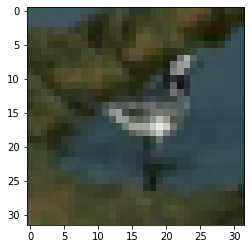

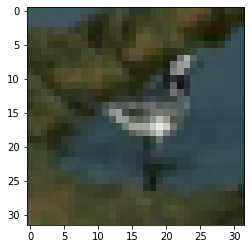

Guess: plane | Label: plane
Guess: plane | Label: plane


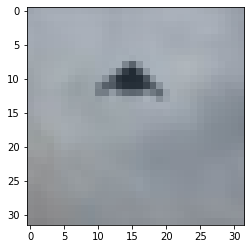

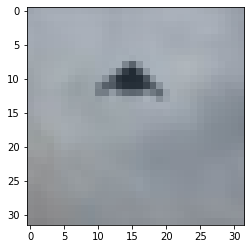

In [21]:
# run a loop which calls the training and testing functions
# you just created
NUM_EPOCHS = 10

for epoch in range(NUM_EPOCHS):
    print("Epoch: ", epoch + 1)
    train_one_epoch(model, train_loader, optimizer, criterion, device)
    test(model,test_loader, device)

#Save the weights

In [ ]:
# Save the weights of your model

torch.save(model.state_dict(), './model.pt')

In [ ]:
# power outage!
# you've lost all your weights.
# or have you?
# TODO: reload the weights you just (hopefully) saved

newModel = CNN()
newModel.load_state_dict(torch.load('./model.pt'))

#References
https://pytorch.org/docs/stable/hub.html

In [ ]:
                         
                        # Conv2d
                        # MaxPool2d
                        # Linear
                        # torch.nn.fucntional
                        # torch.utils.data
                        # torchvision.datasets

                        # Feed Forward Neural Networks
                          # Theory and implementation
                        # Backpropagation
                        # Convolutional Neural Networks
                          # Theory and implementation
                        # RNN's and LSTM's
                        # Anaconda
                        # PyTorch

                        # Regularization - L1, L2, Dropout
                        # Batch Normalization
                        # ADAM
                        # Transformers
                        # GAN's
                        # Reinforcement Learning
                        # Autoencoders
                        # Unsupervised Learning
                        